# Лабораторная работа 4
Вариант 3 

Сутдент: Будникова Валерия Павловна 

группа: М8О-307Б-19  

### Часть 4_1

In [7]:
def Plot2(Xi, Yi, X, Y, t1 = ''):
    fig = plt.figure(figsize= (6, 6))
    plt.scatter(Xi, Yi, c = 'r')
    plt.plot(Xi, Yi, c = 'r')
    plt.plot(X, Y, c = 'b')
    plt.plot(Xi, Yi, c = 'r')
    plt.title(t1)
    plt.show()

In [5]:
def RungeRombergMethod(Met, h, r, p):
    if (r >= 1):
        return np.abs((Met.Get(h)[::r] - Met.Get(h * r)) / (r ** p - 1)).tolist()
    else :
        return np.abs((Met.Get(h) - Met.Get(h * r)[::int(1/r)]) / (r ** p - 1)).tolist()

#### Задание: 
Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде программ, задавая в качестве входных данных шаг сетки h. С использованием разработанного программного обеспечения решить задачу Коши для ОДУ 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

| Краевая задача | Точное решение |
|:------:|:------:|
|$$ y'' - 2y - 4x^2e^{x^2} = 0 \\ y(0) = 3 \\ y'(0) = 0 \\ x \in [0, 1] \\ h = 0.1 $$|$$ y = e^{x^2} + e^{x\sqrt{2}} + e^{-x\sqrt{2}} $$|


$$ 
y' = z \\
z'= 2y + 4x^2e^{x^2} \\ 
y(0) = 3 \\
z(0) = 0
$$

Метод Эйлера

$$ 
y' = z \\
y(0) = 3 \\
z'= 2y + 4x^2e^{x^2} \\ 
z(0) = 0
$$

In [3]:
h = 0.1

f = lambda x: math.exp(x**2) + math.exp(x * math.sqrt(2)) + math.exp(-x * math.sqrt(2))

dy = lambda x, y, z: z
dz = lambda x, y, z: 2*y + x**2 * 4 * math.exp(x**2)
dy1 = lambda x, y, z: z
dz1 = lambda x, y, z: 2*y + x**2 * 4 * math.exp(x**2)

y = 3.00000 	 Euler_y = 3.00000 		 RungeRomberg: 0.00000	 Локальная погрешность: 0.00000
y = 3.19080 	 Euler_y = 3.18750 		 RungeRomberg: 0.00345	 Локальная погрешность: 0.20120
y = 3.80521 	 Euler_y = 3.77835 		 RungeRomberg: 0.03670	 Локальная погрешность: 0.25638
y = 4.98956 	 Euler_y = 4.90878 		 RungeRomberg: 0.11377	 Локальная погрешность: 0.37896
y = 7.07465 	 Euler_y = 6.88234 		 RungeRomberg: 0.27335	 Локальная погрешность: 0.63594

Погрешность решения:  0.21033605921419316


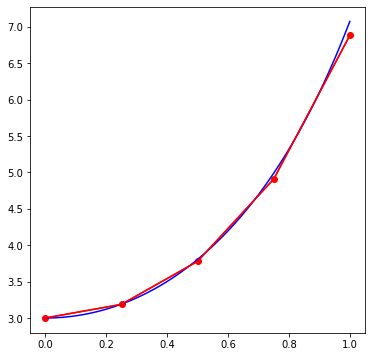

In [16]:
class Euler:
    def __init__(self, x0, y0, z0, finish):
        self.x0 = x0
        self.y0 = y0
        self.z0 = z0
        self.finish = finish

    def Get(self, h):
        xk = self.x0
        yk = self.y0
        zk = self.z0

        self.Yk = [self.y0]
        self.Zk = [self.z0]
        self.Xk = [self.x0]
        
        self.eps_loc = [0]
        
        while not math.isclose(xk, self.finish):
            z_predictor = zk + h * dz(xk, yk, zk)
            y_predictor = yk + h * dy(xk, yk, zk)

            z_corrector = zk + h * (dz(xk, yk, zk) + dz(xk + h, y_predictor, z_predictor)) / 2
            y_corrector = yk + h * (dy(xk, zk, zk) + dy(xk + h, y_predictor, z_predictor)) / 2


            self.eps_loc.append(h**2 * dz(xk + h/2, y_corrector, z_corrector) / 2)

            xk += h
            yk = y_corrector
            zk = z_corrector

            self.Yk.append(yk)
            self.Zk.append(zk)
            self.Xk.append(xk)

        return np.array(self.Yk)
        
    def Get_True_Val(self, f, h):
        xk = self.x0
        Val = [self.y0]
        while not math.isclose(xk, self.finish):
            xk += h
            Val.append(f(xk))
        return Val

x0 = 0.0
y0 = 3.0
z0 = 0.0
el = Euler(x0, y0, z0, 1)

h = 0.25
rrm = RungeRombergMethod(el, h, 1/2, 1)

el_ans = el.Get(h)
true_ans = el.Get_True_Val(f, h)

for i in range(len(el_ans)):
    print(f"y = {true_ans[i]:.5f} \t Euler_y = {el_ans[i]:.5f} \t"+ 
            f"\t RungeRomberg: {rrm[i]:.5f}"  +
            f"\t Локальная погрешность: {el.eps_loc[i]:.5f}")

eps_h = math.sqrt(np.sum(np.square(el_ans - true_ans)))

print("\nПогрешность решения: ", eps_h)


el_ans = el.Get(h)
X_ = np.linspace(0,  1, num=100)
Y_ = [f(x) for x in X_]
Plot2(el.Xk, el_ans, X_, Y_)

y = 3.00000 	 RungeKutta_y = 3.00000 		 RungeRomberg: 0.00000
y = 3.03008 	 RungeKutta_y = 3.03008 		 RungeRomberg: 0.00000
y = 3.12135 	 RungeKutta_y = 3.12134 		 RungeRomberg: 0.00000
y = 3.27689 	 RungeKutta_y = 3.27689 		 RungeRomberg: 0.00000
y = 3.50214 	 RungeKutta_y = 3.50213 		 RungeRomberg: 0.00000
y = 3.80521 	 RungeKutta_y = 3.80520 		 RungeRomberg: 0.00001
y = 4.19758 	 RungeKutta_y = 4.19757 		 RungeRomberg: 0.00001
y = 4.69501 	 RungeKutta_y = 4.69499 		 RungeRomberg: 0.00002
y = 5.31897 	 RungeKutta_y = 5.31895 		 RungeRomberg: 0.00003
y = 6.09877 	 RungeKutta_y = 6.09873 		 RungeRomberg: 0.00004
y = 7.07465 	 RungeKutta_y = 7.07459 		 RungeRomberg: 0.00006

Погрешность решения:  7.967105337097549e-05


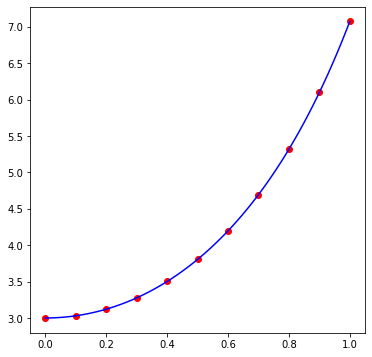

In [90]:
class RungeKutta:
    def __init__(self, x0, y0, z0, finish):
        self.x0 = x0
        self.y0 = y0
        self.z0 = z0
        self.finish = finish

    def Get(self, h, dz = dz1, dy = dy1):
        xk = self.x0
        yk = self.y0
        zk = self.z0

        self.Yk = [y0]
        self.Xk = [x0]
        self.Zk = [z0]
        
        while not math.isclose(xk, self.finish):
            L1 = h * dz(xk, yk, zk)
            K1 = h * dy(xk, yk, zk)

            L2 = h * dz(xk + h / 2, yk + K1 / 2, zk + L1 / 2)
            K2 = h * dy(xk + h / 2, yk + K1 / 2, zk + L1 / 2)
            

            L3 = h * dz(xk + h / 2, yk + K2 / 2, zk + L2 / 2)
            K3 = h * dy(xk + h / 2, yk + K2 / 2, zk + L2 / 2)

            L4 = h * dz(xk + h, yk + K3, zk + L3)
            K4 = h * dy(xk + h, yk + K3, zk + L3)

            delt_y = (K1 + 2 * K2 + 2 * K3 + K4) / 6
            delt_z = (L1 + 2 * L2 + 2 * L3 + L4) / 6

            z = zk + delt_z
            y = yk + delt_y

            xk += h
            yk = y
            zk = z


            self.Xk.append(xk)
            self.Yk.append(yk)
            self.Zk.append(zk)

        return np.array(self.Yk)
        
    def Get_True_Val(self, f, h):
        xk = self.x0
        Val = [self.y0]
        while not math.isclose(xk, self.finish):
            xk += h
            Val.append(f(xk))
        return Val

x0 = 0.0
y0 = 3.0
z0 = 0.0

rk = RungeKutta(x0, y0, z0, 1)

rrm = RungeRombergMethod(rk, h, 1/2, 4)
rk_ans = rk.Get(h)
true_ans = rk.Get_True_Val(f, h)

for i in range(len(rk_ans)):
     print(f"y = {true_ans[i]:.5f} \t RungeKutta_y = {rk_ans[i]:.5f} \t"+ 
            f"\t RungeRomberg: {rrm[i]:.5f}") 

eps_h = math.sqrt(np.sum(np.square(rk_ans - true_ans)))

print("\nПогрешность решения: ", eps_h)

rk_ans = rk.Get(h)
X_ = np.linspace(0,  1, num=100)
Y_ = [f(x) for x in X_]
Plot2(rk.Xk, rk_ans, X_, Y_)

Метод Адамса

y = 3.00000 	 Adams_y = 3.00000 		 RungeRomberg: 0.00000
y = 3.03008 	 Adams_y = 3.03008 		 RungeRomberg: 0.00000
y = 3.12135 	 Adams_y = 3.12134 		 RungeRomberg: 0.00000
y = 3.27689 	 Adams_y = 3.27689 		 RungeRomberg: 0.00091
y = 3.50214 	 Adams_y = 3.50212 		 RungeRomberg: 0.00359
y = 3.80521 	 Adams_y = 3.80800 		 RungeRomberg: 0.00337
y = 4.19758 	 Adams_y = 4.20693 		 RungeRomberg: 0.00028
y = 4.69501 	 Adams_y = 4.71657 		 RungeRomberg: 0.00912
y = 5.31897 	 Adams_y = 5.36112 		 RungeRomberg: 0.02574
y = 6.09877 	 Adams_y = 6.17395 		 RungeRomberg: 0.05393
y = 7.07465 	 Adams_y = 7.20143 		 RungeRomberg: 0.09940

Погрешность решения:  0.15512138061344175


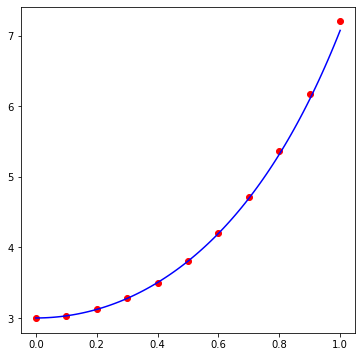

In [91]:
class Adams:
    def __init__(self, x0, y0, z0, finish):
        self.x0 = x0
        self.y0 = y0
        self.z0 = z0
        self.rk = RungeKutta(x0, y0, x0, 1)
        self.finish = finish
        
    def Get(self, h):
        xk = self.x0
        
        self.Yk = rk.Get(h)[:4].tolist()
        self.Xk = rk.Xk[:4]
        self.Zk = rk.Zk[:4]
        
        xk += 3*h
        while not math.isclose(xk, self.finish):
            z_predictor = self.Zk[-1] + h * (55 * dz(self.Xk[-1], self.Yk[-1], self.Zk[-1]) - 
                                             59 * dz(self.Xk[-2], self.Yk[-2], self.Zk[-2]) + 
                                             37 * dz(self.Xk[-3], self.Yk[-3], self.Zk[-3]) - 
                                             9  * dz(self.Xk[-4], self.Yk[-4], self.Zk[-4])) / 24
            
            y_predictor = self.Yk[-1] + h * (55 * dy(self.Xk[-1], self.Yk[-1], self.Zk[-1]) - 
                                             59 * dy(self.Xk[-2], self.Yk[-2], self.Zk[-2]) + 
                                             37 * dy(self.Xk[-3], self.Yk[-3], self.Zk[-3]) - 
                                             9  * dy(self.Xk[-4], self.Yk[-4], self.Zk[-4])) / 24
            

            z_corrector = self.Zk[-1] + h * (9 * dz(xk + h, y_predictor, z_predictor) + 
		                                    19 * dz(self.Xk[-1] + h, self.Yk[-1], self.Zk[-1]) - 
		                                    5  * dz(self.Xk[-2] + h, self.Yk[-2], self.Zk[-2]) + 
		                                         dz(self.Xk[-3] + h, self.Yk[-3], self.Zk[-3])) / 24
            
            y_corrector = self.Yk[-1] + h * (9 * dy(xk + h, y_predictor, z_predictor) + 
		                           19 * dy(self.Xk[-1] + h, self.Yk[-1], self.Zk[-1]) - 
		                           5  * dy(self.Xk[-2] + h, self.Yk[-2], self.Zk[-2]) + 
		                                dy(self.Xk[-3] + h, self.Yk[-3], self.Zk[-3])) / 24


            xk += h

            self.Xk.append(xk)
            self.Yk.append(y_corrector)
            self.Zk.append(z_corrector)

        return np.array(self.Yk)
        
    def Get_True_Val(self, f, h):
        xk = self.x0
        Val = [self.y0]
        while not math.isclose(xk, self.finish):
            xk += h
            Val.append(f(xk))
        return Val

x0 = 0.0
y0 = 3.0
z0 = 0.0

ad  = Adams(x0, y0, z0, 1)

rrm = RungeRombergMethod(ad, h, 1/2, 1)
ad_ans = ad.Get(h)
true_ans = ad.Get_True_Val(f, h)

for i in range(len(ad_ans)):
    print(f"y = {true_ans[i]:.5f} \t Adams_y = {ad_ans[i]:.5f} \t"+ 
            f"\t RungeRomberg: {rrm[i]:.5f}")

eps_h = math.sqrt(np.sum(np.square(ad_ans - true_ans)))

print("\nПогрешность решения: ", eps_h)

ad_ans = ad.Get(h)
X_ = np.linspace(0,  1, num=100)
Y_ = [f(x) for x in X_]
Plot2(ad.Xk, ad_ans, X_, Y_)

### Часть 4_2

#### Задание: 
Реализовать метод стрельбы и конечно-разностный метод решения краевой задачи для ОДУ в виде программ. С использованием разработанного программного обеспечения решить краевую задачу для обыкновенного дифференциального уравнения 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением.  

| Задача Коши | Точное решение |
|:------:|:------:|
|$$ x^2(x + 1)y'' - 2y  = 0 \\ y'(1) = -1 \\ 2y(2) - 4y'(2)=4 $$| $$ y(x) = \frac{1}{x} + 1$$|


$$
z = y' \\
z' = \frac{2y}{x^2(x + 1)} \\
z(1) = -1 \\
z(2) = \frac{2y(2) - 4}{4}
$$

In [92]:
def Plot2(Xi, Yi, X, Y, t1 = ''):
    fig = plt.figure(figsize= (6, 6))
    plt.scatter(Xi, Yi, c = 'r')
    plt.plot(X, Y, c = 'b')
    plt.title(t1)
    plt.show()

In [93]:
def RungeRombergMethod(Met, dz, dy, h, r, p):
    if (r >= 1):
        return np.max(np.abs((Met.Get(h, dz, dy)[::r] - Met.Get(h * r, dz, dy)) / (r ** p - 1)).tolist())
    else :
        return np.max(np.abs((Met.Get(h, dz, dy) - Met.Get(h * r, dz, dy)[::int(1/r)]) / (r ** p - 1)).tolist())

In [94]:
class RungeKutta:
    def __init__(self, x0, y0, z0, finish):
        self.x0 = x0
        self.y0 = y0
        self.z0 = z0
        self.finish = finish

    def Get(self, h, dz = dz1, dy = dy1):
        xk = self.x0
        yk = self.y0
        zk = self.z0

        self.Yk = [self.y0]
        self.Xk = [self.x0]
        self.Zk = [self.z0]
        
        while abs(xk - self.finish) > abs(h) / 10:
            L1 = h * dz(xk, yk, zk)
            K1 = h * dy(xk, yk, zk)

            L2 = h * dz(xk + h / 2, yk + K1 / 2, zk + L1 / 2)
            K2 = h * dy(xk + h / 2, yk + K1 / 2, zk + L1 / 2)
            

            L3 = h * dz(xk + h / 2, yk + K2 / 2, zk + L2 / 2)
            K3 = h * dy(xk + h / 2, yk + K2 / 2, zk + L2 / 2)

            L4 = h * dz(xk + h, yk + K3, zk + L3)
            K4 = h * dy(xk + h, yk + K3, zk + L3)

            delt_y = (K1 + 2 * K2 + 2 * K3 + K4) / 6
            delt_z = (L1 + 2 * L2 + 2 * L3 + L4) / 6

            z = zk + delt_z
            y = yk + delt_y

            xk += h
            yk = y
            zk = z

            self.Xk.append(xk)
            self.Yk.append(yk)
            self.Zk.append(zk)

        return np.array(self.Yk)
        
    def Get_True_Val(self, f, h):
        xk = self.x0
        Val = [self.y0]
        while not math.isclose(xk, self.finish):
            xk += h
            Val.append(f(xk))
        return Val

#### Задание: 
Реализовать метод стрельбы и конечно-разностный метод решения краевой задачи для ОДУ в виде программ. С использованием разработанного программного обеспечения решить краевую задачу для обыкновенного дифференциального уравнения 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

| Краевая задача | Точное решение |
|:------:|:------:|
|$$ x^2(x+1)y'' - 2y = 0 \\ y'(1)=-1 \\ 2y(2) - 4y'(2) = 4 $$|$$ y = \frac{1}{x} + 1 $$|


$$ 
y'' = \frac{2y}{x^2(x+1)} \\
y'(1) = -1 \\ 
y(2) = \frac{1}{2} + 2y'(2) \\
$$

$$ 
y' = z \\
z' = \frac{2y}{x^2(x+1)} \\
z(1) = -1 \\ 
y(2) = \mu \\
z(2) = \frac{2\mu - 4}{4} \\
$$

In [95]:
def RungeRombergMet(Met, h, r, p):
    if (abs(r) >= 1):
        return np.max(np.abs((Met.Get(h)[::r] - Met.Get(h * r)) / (r ** p - 1)).tolist())
    else :
        return np.max(np.abs((Met.Get(h) - Met.Get(h * r)[::int(1/r)]) / (r ** p - 1)).tolist())

In [96]:
f = lambda x: 1/x + 1
dy2 = lambda xk, yk, zk : zk
dz2 = lambda xk, yk, zk : 2 * yk / (xk**2 * (xk + 1))

Метод стрельбы
 y(2) = 1.5    y(2) = mu = 1.5000292211448194
Ошибка Рунге Ромберга: 0.00013936855035523443


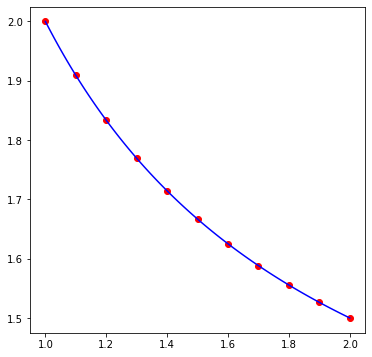

In [97]:
class Shooting:
    def __init__(self, mu1, mu2):
        self.mu1 = mu1
        self.mu2 = mu2

    def Get(self, h):
        a = 2
        z_a = lambda mu: (2 * mu - 4) / 4

        b = 1
        z_b = -1

        eps = 0.000001

        mu1 = self.mu1
        mu2 = self.mu2
        rk1 = RungeKutta(x0 = a, y0 = mu1, z0 = z_a(mu1), finish=b)
        rk2 = RungeKutta(x0 = a, y0 = mu2, z0 = z_a(mu2), finish=b)
        rk1.Get(h, dz = dz2, dy =dy2)
        rk2.Get(h, dz = dz2, dy =dy2)


        phi1 = rk1.Zk[-1] + 1 
        phi2 = rk2.Zk[-1] + 1 

        while abs(phi2) > eps:
            dphi = (phi2 - phi1) / (mu2 - mu1);
            dmu = - phi2 / dphi;
            mu1 = mu2;
            mu2 += dmu;

            phi1 = phi2;

            rk = RungeKutta(x0 = a, y0 = mu2, z0 = z_a(mu2), finish=b)
            rk.Get(h, dz = dz2, dy =dy2)
            
            phi2 = rk.Zk[-1] - z_b  

        self.Xi = rk.Xk
        self.Yi = rk.Yk
        self.mu = mu2
        return np.array(self.Yi)

sh = Shooting(1, 3)

Yi = sh.Get(-0.1)
Xi = sh.Xi


X = np.linspace(np.min(Xi), np.max(Xi), 100)
Y = [f(x) for x in X]

print("Метод стрельбы")

print(f" y(2) = {f(2)}    y(2) = mu = {sh.mu}")


print(f"Ошибка Рунге Ромберга: {RungeRombergMet(sh, -0.1, 2, 2)}")

Plot2(Xi, Yi, X, Y)


Метод конечных разностей

$$ 
x^2(x+1)y'' - 2y = 0 $$
$$ y'' + \frac{-2}{x^2(x+1)}y = 0 $$

$$ p(x) = 0 $$
$$ q(x) = \frac{-2}{x^2(x+1)} $$
$$ r(x) = 0 $$

In [98]:
#TRIDIAGONAL_MATRIX_ALGORITHM
class Tridiagonal_Matrix_Algorithm:
    def __init__(self, A, _d):
        self.n = len(_d)
        self.a = []
        self.b = []
        self.c = []
        self.d = _d
        self.A = A

        self.a.append(0);
        self.b.append(self.A[0][0])
        self.c.append(self.A[0][1])
        for i in range(1, self.n - 1):
            self.a.append(self.A[i][i - 1])
            self.b.append(self.A[i][i])
            self.c.append(self.A[i][i + 1])

        self.a.append(self.A[self.n - 1][self.n - 2])
        self.b.append(self.A[self.n - 1][self.n - 1])
        self.c.append(0)

        self.Make_P_andQ()
        self.x = self.Make_x()

    def Ans(self):
        return self.x

    def Make_P_andQ(self):
        self.p = []
        self.q = []
        self.p.append(- self.c[0] / self.b[0])
        self.q.append(self.d[0] / self.b[0])

        for i in range(1, self.n - 1):
           self.p.append(- self.c[i] / (self.b[i] + self.a[i] * self.p[i - 1]))
           self.q.append((self.d[i] - self.a[i] * self.q[i - 1]) / (self.b[i] + self.a[i] * self.p[i - 1]))


    def Make_x(self):
        self.ans = np.zeros(self.n)

        self.ans[self.n - 1] = (self.d[self.n - 1] - self.a[self.n - 1] * self.q[self.n - 2]) / (self.b[self.n - 1] + self.a[self.n - 1] * self.p[self.n - 2]);

        for i in range(self.n - 2, -1, -1):
            self.ans[i] = self.p[i] * self.ans[i + 1] + self.q[i]

        return self.ans.tolist()

In [99]:
def RungeRombergMet(Met, h, r, p):
    if (r >= 1):
        return np.max(np.abs((Met.Get(h) - Met.Get(h * r)[::r]) / (r ** p - 1)).tolist())
    else :
        return np.max(np.abs((Met.Get(h)[::int(1/r)] - Met.Get(h * r)) / (r ** p - 1)).tolist())

In [100]:
q = lambda x: -2 / ((x+1) * (x**2))
p = lambda x: 0
r = lambda x: 0

Ошибка Рунге Ромберга: 1.3802287350594966e-05


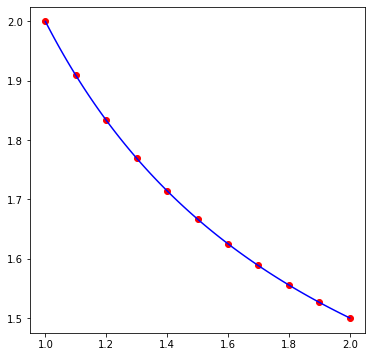

In [101]:
class Met:
    def Get(self, n):
        x0 = 1
        xn = 2

        h = (xn - x0) / n

        Xk = np.arange(x0, xn + h, h)

        A = np.zeros((n + 1, n + 1))
        b = np.zeros(n + 1)

        A[0][0] = 1
        A[0][1] = 0
        b[0] = 2

        for i in range(1, n):

            A[i][i - 1] = 1 / h**2 - p(Xk[i]) / (2*h)
            A[i][i] = -2 / h**2 + q(Xk[i])
            A[i][i + 1] = 1 / h**2 + p(Xk[i]) / (2*h)
            
            b[i] = -r(Xk[i])

        A[n][n-1] = 0
        A[n][n] = 1
        b[n] = 1.5

        tr = Tridiagonal_Matrix_Algorithm(A, b)
        Yk = tr.Ans()
        self.Xk = Xk

        return np.array(Yk)

m = Met()
Yk = m.Get(10)
Xk = m.Xk

X = np.linspace(Xk[0], Xk[-1], 100)
Y = [f(x) for x in X]

print(f"Ошибка Рунге Ромберга: {RungeRombergMet(m, 50, 2, 1)}")

Plot2(Xk, Yk, X, Y)

